In [1]:
import urllib, json
%matplotlib inline

In [2]:
url = "http://open.datapunt.amsterdam.nl/EtenDrinken.json"
response = urllib.urlopen(url)
data = json.loads(response.read())

In [3]:
data[0]

{u'dates': {u'enddate': u'', u'startdate': u'27-01-2011'},
 u'details': {u'de': {u'calendarsummary': u'Mo -Mi : 10:00 - 21:00 Uhr\nDo : 10:00 - 01:00 Uhr\nFr , Sa : 10:00 - 02:00 Uhr\nSo : 10:30 - 20:00 Uhr.',
   u'language': u'de',
   u'longdescription': u'',
   u'shortdescription': u'',
   u'title': u'Eetsalon van Dobben B.V.'},
  u'en': {u'calendarsummary': u'Mo -We : 10:00 - 21:00 hour\nTh : 10:00 - 01:00 hour\nFr , Sa : 10:00 - 02:00 hour\nSu: 10:30 - 20:00 hour.',
   u'language': u'en',
   u'longdescription': u'',
   u'shortdescription': u'This typical Amsterdam deluxe lunchroom is the meeting place of artists, soccer players and many other locals. Its Van Dobben croquette is famed far beyond the city limits.',
   u'title': u'Eetsalon van Dobben B.V.'},
  u'es': {u'calendarsummary': u'Lu -Mi : 10:00 - 21:00 Hora\nJu : 10:00 - 01:00 Hora\nVi , Sa : 10:00 - 02:00 Hora\nDo : 10:30 - 20:00 Hora.',
   u'language': u'es',
   u'longdescription': u'',
   u'shortdescription': u'',
   u'ti

In [4]:
eetgelegenheden = []

for d in data:
    naam = d['title']
    try:
        beschrijving = d['details']['nl']['shortdescription']
    except:
        beschrijving = "geen"
    lng = float(d['location']['longitude'].replace(',','.'))
    lat = float(d['location']['latitude'].replace(',','.'))    
    eetgelegenheden.append([naam, beschrijving, lng, lat])

In [5]:
eetgelegenheden[0]

[u'Eetsalon van Dobben B.V.',
 u'Deze typisch Amsterdamse luxe lunchroom is een pleisterplaats voor artiesten, voetballers en vele andere Amsterdammers. Tot ver buiten de stadsgrenzen is de Van Dobben croquet een begrip.',
 4.895306,
 52.366056]

In [7]:
import pandas as pd

data = pd.read_csv('PARKPLANTSOENGROEN.csv', sep=';')
data.head()

,OBJECTNUMMER,Groen_ID,Stadsdeel,Naam,BBQ,Toelichting_bbq,Stadspark,Oppervlakte_m2,COORDS,LNG,LAT,Unnamed: 11
0,1,1,Nieuw-West,Gerbrandypark,RESTRICTIES,In het Gerbrandypark is barbecueën alleen in b...,N,71288,"POLYGON((4.826794 52.379047,4.826813 52.379006...","4,831153","52,3778535",NaN
1,2,2,Zuid,Park Schinkeleilanden,ONBEKEND,NaN,J,17901,"MULTIPOLYGON(((4.850506 52.34452,4.85053 52.34...","4,8506935","52,344822",NaN
2,3,3,Zuid,Amstelpark,VERBOD,In het Amstelpark mag u niet barbecueën.,J,437050,"MULTIPOLYGON(((4.890624 52.328765,4.890614 52....","4,894538","52,3292545",NaN
3,4,4,Zuid,`t Kleine Loopveld,ONBEKEND,NaN,N,165866,"MULTIPOLYGON(((4.892118 52.322563,4.892229 52....","4,87896","52,3230285",NaN
4,5,5,Zuid,Sarphatipark,VERBOD,In het Sarphatipark mag u niet barbecueën.,J,41922,"POLYGON((4.898562 52.354808,4.898948 52.354308...","4,8964085","52,3544025",NaN


In [8]:
parken = []

for _, row in data.iterrows():
    naam = row['Naam']
    lng = float(row['LNG'].replace(',','.'))
    lat = float(row['LAT'].replace(',','.'))  
    opp = row['Oppervlakte_m2']
    parken.append([naam, lng, lat, opp])
    
print parken[0]

['Gerbrandypark', 4.831153, 52.3778535, 71288]


In [9]:
def vind_eetplek_dichtste_bij_park(parknaam):
    result = []
    lng, lat = 0, 0
    for p in parken:
        if p[0] == parknaam:
            lng, lat = p[1], p[2]
            break
            
    mindist = 1e9
    if lat != 0:
        for eetgelegenheid in eetgelegenheden:
            dlng = eetgelegenheid[2] - lng
            dlat = eetgelegenheid[3] - lat
            dlatlng = dlng*dlng + dlat*dlat
            if dlatlng < mindist:
                result = eetgelegenheid
                mindist = dlatlng
            
    return result
            
idee = vind_eetplek_dichtste_bij_park("Wertheimpark")

print "--------------------------------------------------------------------"
print "Als je naar het Wertheimpark gaat dan is eetgelegendheid %s vlakbij. Hier is wat ze zeggen over %s; \n\n%s" % (idee[0], idee[0], idee[1])
print "--------------------------------------------------------------------"       
            

--------------------------------------------------------------------
Als je naar het Wertheimpark gaat dan is eetgelegendheid Dignita Hoftuin vlakbij. Hier is wat ze zeggen over Dignita Hoftuin; 

Verborgen achter de Hermitage in Amsterdam ligt Dignita Hoftuin, een ongewoon tuincafé en een sociaal initiatief dat plaatselijk, biologisch eten serveert en tegelijk de gemeenschap steunt. 

--------------------------------------------------------------------


![title](img/wertheimpark.png)

In [11]:
def aantal_eetgelegendheden_rondom_park(parknaam, max_afstand):
    result = 0
    lng, lat = 0, 0
    for p in parken:
        if p[0] == parknaam:
            lng, lat = p[1], p[2]
            break
            
    if lat != 0:
        for eetgelegenheid in eetgelegenheden:
            dlng = eetgelegenheid[2] - lng
            dlat = eetgelegenheid[3] - lat
            dlatlng = dlng*dlng + dlat*dlat
            if dlatlng < max_afstand*max_afstand:
                result += 1
                
    return result


namen, opps, lngs, lats, eetgs = [], [], [], [], []
for p in parken:
    namen.append(p[0])
    opps.append(p[3])
    lngs.append(p[1])
    lats.append(p[2])
    eetgs.append(aantal_eetgelegendheden_rondom_park(p[0], 0.02))
    

#df = pd.DataFrame(index=naam, columns=['grootte', 'eetplekken'])
d = {'oppervlakte': opps, 'eetgelegenheden':eetgs, 'latitude':lats, 'longitude':lngs}
df = pd.DataFrame(data=d, index=namen)
df = df[df['oppervlakte']<1e6]
df.head()

,eetgelegenheden,latitude,longitude,oppervlakte
Gerbrandypark,6,52.377854,4.831153,71288
Park Schinkeleilanden,21,52.344822,4.850694,17901
Amstelpark,18,52.329254,4.894538,437050
`t Kleine Loopveld,6,52.323028,4.878960,165866
Sarphatipark,288,52.354402,4.896408,41922


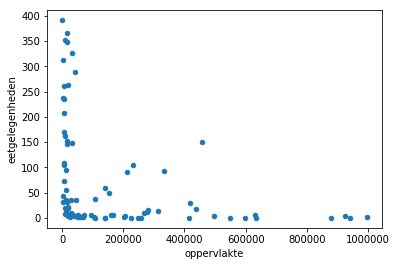

In [12]:
df.plot(kind='scatter', x='oppervlakte', y='eetgelegenheden');

In [13]:
centrum = [52.3693695,4.8986124]

df['afstand_tot_centrum'] = (df['latitude'] - centrum[0]) * (df['latitude'] - centrum[0]) + (df['longitude'] - centrum[1]) * (df['longitude'] - centrum[1]) 
df['afstand_tot_centrum'] *= 10000

In [15]:
df.head()

,eetgelegenheden,latitude,longitude,oppervlakte,afstand_tot_centrum
Gerbrandypark,6,52.377854,4.831153,71288,46.227489
Park Schinkeleilanden,21,52.344822,4.850694,17901,28.988007
Amstelpark,18,52.329254,4.894538,437050,16.258140
`t Kleine Loopveld,6,52.323028,4.878960,165866,25.337051
Sarphatipark,288,52.354402,4.896408,41922,2.288683


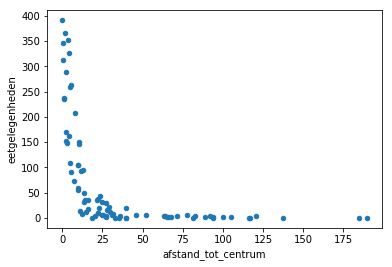

In [16]:
df.plot(kind='scatter', x='afstand_tot_centrum', y='eetgelegenheden');

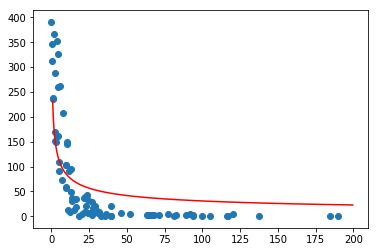

In [18]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array(df['afstand_tot_centrum'])
y = np.array(df['eetgelegenheden'])

from scipy.optimize import curve_fit

def myExpFunc(x, a, b):
    return a * np.power(x, b)

popt, pcov = curve_fit(myExpFunc, X, y)

newX = np.logspace(0, 2.3, base=10)
plt.plot(newX, myExpFunc(newX, *popt), 'r-', 
         label="({0:.3f}*x**{1:.3f})".format(*popt))
plt.scatter(X,y)
plt.show()